In [2]:
from drought.data.pipeline import *
from sklearn.cluster import KMeans
from math import floor

The goal here is to build an unsupervised clustering model which can cluster geographic regions based on climatic variables. 

In [4]:
shape = get_gpd_polygons()

In [9]:
monthly = get_monthly_means_per_polygon()
cluster_input = monthly.groupby(["polygon_id"]).mean()
cluster_input

,month,year,pai,precipitation,temperature,radiation
polygon_id,,,,,,
1,6.342857,2020.314286,3.555716,293.765893,28.775501,1.395512e+07
2,6.394737,2020.342105,3.313128,263.506760,28.734562,1.420633e+07
3,6.096774,2020.354839,3.266357,251.702826,28.469306,1.392554e+07
4,6.384615,2020.384615,3.504819,235.860376,27.832612,1.484121e+07
5,6.384615,2020.384615,3.001037,172.098428,28.273038,1.589685e+07
6,6.384615,2020.384615,0.779162,116.032661,32.536969,1.703984e+07
7,6.384615,2020.384615,0.463933,68.682771,33.269556,1.771369e+07
8,6.384615,2020.384615,0.986440,64.882448,29.343542,1.502093e+07


In [18]:
def ecosystem_clustering(df, feature_cols):
    km = KMeans(n_clusters=4)
    km.fit(df[feature_cols])
    output = df.assign(cluster=km.predict(df[feature_cols]))

    return output

In [19]:
result = ecosystem_clustering(cluster_input, ["temperature", "precipitation", "radiation", "pai"])
result

/home/og309/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,month,year,pai,precipitation,temperature,radiation,cluster
polygon_id,,,,,,,
1,6.342857,2020.314286,3.555716,293.765893,28.775501,1.395512e+07,0
2,6.394737,2020.342105,3.313128,263.506760,28.734562,1.420633e+07,0
3,6.096774,2020.354839,3.266357,251.702826,28.469306,1.392554e+07,0
4,6.384615,2020.384615,3.504819,235.860376,27.832612,1.484121e+07,2
5,6.384615,2020.384615,3.001037,172.098428,28.273038,1.589685e+07,3
6,6.384615,2020.384615,0.779162,116.032661,32.536969,1.703984e+07,1
7,6.384615,2020.384615,0.463933,68.682771,33.269556,1.771369e+07,1
8,6.384615,2020.384615,0.986440,64.882448,29.343542,1.502093e+07,2


In [20]:
shape = shape.set_index(result.index)
shape = shape.assign(cluster = result["cluster"])

<AxesSubplot: >

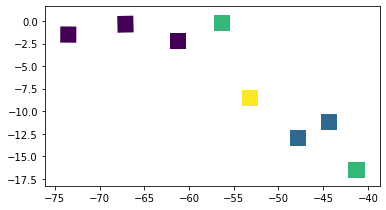

In [21]:
shape.plot(column = shape["cluster"])

In [3]:
import os
os.chdir("/home/og309/drought-with-gedi/notebooks/exploratory/")

In [ ]:
# Classify with time series next

In [5]:
gedi_csv = get_gedi_footprints()

In [7]:
gedi_csv

,pai,l2b_quality_flag,shot_number,lon_lowestmode,lat_lowestmode,geometry,year,month,polygon_id,polygon_spei
90,3.270860,1,20420500100053124,-73.012176,-2.148434,POINT (-73.01217550938594 -2.148433601199582),2019,4,1,Y
92,0.226100,1,20420500100053126,-73.011580,-2.147593,POINT (-73.01158014712219 -2.147592765811703),2019,4,1,Y
104,0.796234,1,20420500100053090,-73.022286,-2.162795,POINT (-73.02228628616268 -2.162794720210879),2019,4,1,Y
111,1.732929,1,21490600100274710,-72.754148,-1.163992,POINT (-72.7541482465911 -1.1639923700881025),2019,4,1,Y
112,1.270815,1,21490600100274708,-72.754743,-1.164835,POINT (-72.75474328953197 -1.1648345603875192),2019,4,1,Y
...,...,...,...,...,...,...,...,...,...,...
21569,4.859155,1,197430800400540965,-40.901799,-16.097564,POINT (-40.901798503505084 -16.09756415167545),2022,6,8,N
21570,2.089660,1,197430800400540966,-40.901472,-16.097975,POINT (-40.90147238514139 -16.09797536938862),2022,6,8,N
21571,2.213748,1,197430800400540967,-40.901166,-16.098368,POINT (-40.90116615300125 -16.098367597271835),2022,6,8,N
21572,0.108898,1,197430800400540968,-40.900845,-16.098774,POINT (-40.90084514219941 -16.098773842809226),2022,6,8,N


In [25]:
shape.geometry.explode()

/tmp/ipykernel_242781/3980981499.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  shape.geometry.explode()


0  0    POLYGON ((-74.41644 -2.39545, -74.39935 -0.605...
1  0    POLYGON ((-67.99355 -1.30614, -68.03598 0.5437...
2  0    POLYGON ((-62.18034 -3.15047, -62.18034 -1.355...
3  0    POLYGON ((-55.41241 -1.09403, -57.20904 -1.094...
4  0    POLYGON ((-54.08853 -9.36877, -54.08853 -7.591...
5  0    POLYGON ((-48.75056 -13.78635, -48.75056 -12.0...
6  0    POLYGON ((-45.25707 -12.09865, -45.25707 -10.3...
7  0    POLYGON ((-42.17013 -17.34344, -42.17013 -15.6...
Name: geometry, dtype: geometry

In [27]:
shape["geometry"][0].exterior.coords()

TypeError: 'CoordinateSequence' object is not callable

In [35]:
shape.geometry.bounds

,minx,miny,maxx,maxy
0,-74.416441,-2.412584,-72.602802,-0.605941
1,-68.035983,-1.306142,-66.197392,0.584974
2,-62.180343,-3.150466,-60.383712,-1.355298
3,-57.209042,-1.094028,-55.412411,0.702519
4,-54.088527,-9.368769,-52.291897,-7.591857
5,-48.750560,-13.786351,-46.953929,-12.035216
6,-45.257066,-12.098650,-43.460435,-10.336418
7,-42.170125,-17.343441,-40.373495,-15.620713


In [54]:
def rasterise_polygon(r, df, shape, polygon):

    df = df[df["polygon_id"] == polygon]
    geometry = shape.geometry[polygon - 1]

    grid = [[pd.DataFrame()]*r for i in range(r)]

    minx, miny, maxx, maxy = geometry.bounds
    stepx = (maxx - minx) / r
    stepy = (maxy - miny) / r

    for i in range(len(df)):
        footprint = df.iloc[[i]]
        lon = footprint["lon_lowestmode"]
        lat = footprint["lat_lowestmode"]
        x = floor((lon - minx) / stepx) 
        y = floor((maxy - lat) / stepy)
        grid[y][x] = pd.concat([grid[y][x], footprint])
        if (i%100000==0):
            print(i)

    return grid

In [135]:
grid_10 = rasterise_polygon(10, gedi_csv, shape, 1)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000


In [137]:
def plot_raster(r, grid, cells, var):

    means = []

    for y in range(r):
        for x in range(r):
            means.append(grid[y][x][var].mean())

    cells[var] = means

    cells.plot(column = var, cmap = "Greens")

In [119]:
def grid_cells(r, shape, polygon):

    geometry = shape.geometry[polygon - 1]
    
    minx, miny, maxx, maxy = geometry.bounds
    stepx = (maxx - minx) / r
    stepy = (maxy - miny) / r

    curx = minx
    cury = maxy

    cells = []

    for y in range(r):
        for x in range(r):
            cell = Polygon([(curx, cury), (curx + stepx, cury), (curx + stepx, cury - stepy), (curx, cury - stepy)])
            cells.append(cell)
            curx += stepx
        cury -= stepy
        curx = minx

    cells = gpd.GeoDataFrame(cells, columns = ["geometry"])
    
    return cells

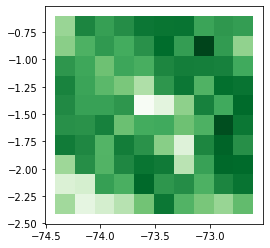

In [138]:
plot_raster(10, grid_10, cells, "pai")

In [136]:
cells = grid_cells(10, shape, 1)

In [113]:
grid_3

[[            pai  l2b_quality_flag         shot_number  lon_lowestmode  \
  3665   3.116580                 1   20340500400243370      -74.369303   
  3666   0.543092                 1   20340500400243381      -74.366029   
  3667   3.662637                 1   20340500400243363      -74.371383   
  3668   2.875643                 1   20340500400243364      -74.371086   
  3669   3.266392                 1   20340500400243365      -74.370789   
  ...         ...               ...                 ...             ...   
  24017  7.556671                 1  191571100100052692      -73.941316   
  24018  4.676648                 1  191571100100052695      -73.940425   
  24019  0.357665                 1  192710600400764440      -74.185257   
  24020  3.715483                 1  192710600400764441      -74.184967   
  24021  1.188477                 1  192710800400250574      -74.181465   
  
         lat_lowestmode                                        geometry  year  \
  3665        -0

In [95]:
shape.geometry

0    POLYGON ((-74.41644 -2.39545, -74.39935 -0.605...
1    POLYGON ((-67.99355 -1.30614, -68.03598 0.5437...
2    POLYGON ((-62.18034 -3.15047, -62.18034 -1.355...
3    POLYGON ((-55.41241 -1.09403, -57.20904 -1.094...
4    POLYGON ((-54.08853 -9.36877, -54.08853 -7.591...
5    POLYGON ((-48.75056 -13.78635, -48.75056 -12.0...
6    POLYGON ((-45.25707 -12.09865, -45.25707 -10.3...
7    POLYGON ((-42.17013 -17.34344, -42.17013 -15.6...
Name: geometry, dtype: geometry

In [6]:
test = pd.DataFrame()

In [22]:
pd.concat([gedi_csv.iloc[[0]], test])

,pai,l2b_quality_flag,shot_number,lon_lowestmode,lat_lowestmode,geometry,year,month,polygon_id,polygon_spei
90,3.27086,1,20420500100053124,-73.012176,-2.148434,POINT (-73.01217550938594 -2.148433601199582),2019,4,1,Y
92,0.22610,1,20420500100053126,-73.011580,-2.147593,POINT (-73.01158014712219 -2.147592765811703),2019,4,1,Y


In [8]:
test

,pai,l2b_quality_flag,shot_number,lon_lowestmode,lat_lowestmode,geometry,year,month,polygon_id,polygon_spei
92,0.2261,1,20420500100053126,-73.01158,-2.147593,POINT (-73.01158014712219 -2.147592765811703),2019,4,1,Y


In [13]:
test

,pai,l2b_quality_flag,shot_number,lon_lowestmode,lat_lowestmode,geometry,year,month,polygon_id,polygon_spei
92,0.2261,1,20420500100053126,-73.01158,-2.147593,POINT (-73.01158014712219 -2.147592765811703),2019,4,1,Y


In [27]:
footprint["lat_lowestmode"]

-2.148433601199582

In [18]:
lat = gedi_csv.iloc[[0]]["lon_lowestmode"]

In [33]:
from math import floor

In [21]:
floor(lat - 50)

-124

In [23]:
len(gedi_csv[gedi_csv["polygon_id"] == 1])

1447137

In [26]:
100002 % 100000 == 0

False

In [63]:
type(shape["geometry"][0])

shapely.geometry.polygon.Polygon

In [64]:
from shapely import Polygon

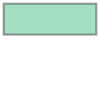

In [66]:
Polygon([(75,1), (78,1), (78,0), (75, 0)])

In [71]:
shape.geometry

0    POLYGON ((-74.41644 -2.39545, -74.39935 -0.605...
1    POLYGON ((-67.99355 -1.30614, -68.03598 0.5437...
2    POLYGON ((-62.18034 -3.15047, -62.18034 -1.355...
3    POLYGON ((-55.41241 -1.09403, -57.20904 -1.094...
4    POLYGON ((-54.08853 -9.36877, -54.08853 -7.591...
5    POLYGON ((-48.75056 -13.78635, -48.75056 -12.0...
6    POLYGON ((-45.25707 -12.09865, -45.25707 -10.3...
7    POLYGON ((-42.17013 -17.34344, -42.17013 -15.6...
Name: geometry, dtype: geometry

In [132]:
import sys
sys.getsizeof(grid_3)

88